,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000,0.118487,0.000000e+00,5.047593
1,0.02000,-0.000013,0.118449,-8.473173e-07,5.045987
2,0.04000,-0.000029,0.118434,-1.901559e-06,5.045331
3,0.06000,-0.000039,0.118395,-2.613447e-06,5.043657
4,0.08000,-0.000049,0.118363,-3.267837e-06,5.042298
...,...,...,...,...,...
1399,27.98000,0.032373,7.939680,2.158210e-03,338.232939
1400,28.00000,0.032476,7.932300,2.165060e-03,337.918548
1401,28.02000,0.032579,7.925353,2.171911e-03,337.622604
1402,28.04000,0.032681,7.918794,2.178761e-03,337.343188


,Time (s),Extensometer (mm),Load (kN),Engineering strain (abs.),Engineering stress (MPa)
0,0.00000,0.000000,0.110160,0.000000e+00,4.692835
1,0.02000,0.000006,0.110133,3.920801e-07,4.691701
2,0.04000,0.000013,0.110127,8.983620e-07,4.691429
3,0.06000,0.000019,0.110124,1.258867e-06,4.691318
4,0.08000,0.000024,0.110095,1.590447e-06,4.690104
...,...,...,...,...,...
2781,55.62000,0.244189,9.846316,1.627928e-02,419.456249
2782,55.64000,0.244521,9.824625,1.630137e-02,418.532206
2783,55.66000,0.244852,9.805338,1.632345e-02,417.710573
2784,55.68000,0.245183,9.788039,1.634554e-02,416.973630


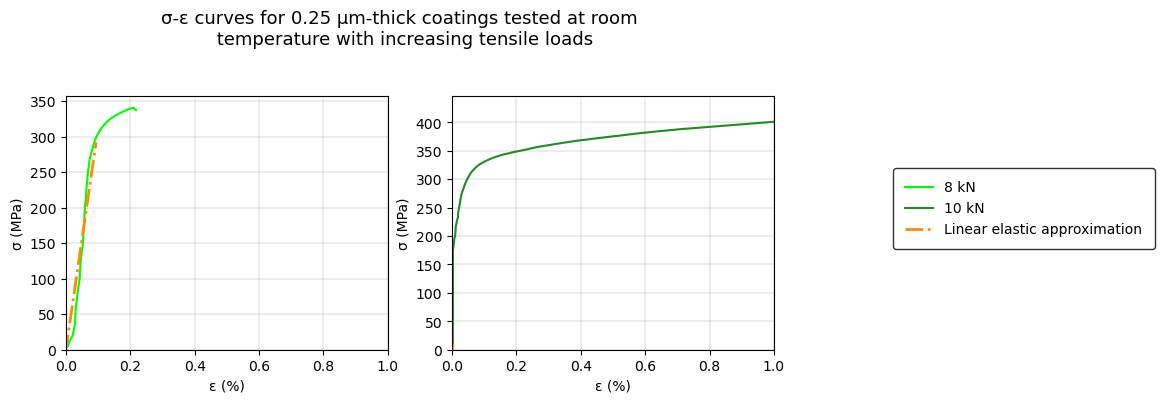

,Load (kN),R² value,Linear regression reliability,Approximate incremental modulus (GPa)
0,8,0.932999,ADMISSIBLE,311
1,10,-138.525595,NOT GOOD,289


In [49]:
#---------------------------------------------|| PHYTON CLASSES AND LIBRARIES ||---------------------------------------------#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import colorama, statistics
from scipy.interpolate import griddata
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from colorama import Fore, Style, Back
from statistics import mean 
from scipy import stats

#-------------------------------------------------|| DECLARED FUNCTIONS ||--------------------------------------------------#


def engineering_stress(load):
    A0 = 23.474
    return load*1000/A0

def engineering_strain(extension): 
    L0 = 15 
    return extension/L0

def median_value(array):
    sum_val = 0
    for i in range (0, array.shape[0]):
        sum_val += array[i]
    return sum_val/array.shape[0]  

def r2regression(valori_reali, valori_attesi):
    RSS = float(0)
    TSS = float(0)
    media = median_value(valori_reali) 
    for i in range (0, valori_reali.shape[0]):
        RSS += (valori_reali[i] - valori_attesi[i])**2
        TSS += (valori_reali[i] - media)**2
    return round(float(1-RSS/TSS), 4)

def regression_reliability(r2):
    if(r2>=0.95):
        return 'VERY GOOD'
    elif(r2<0.95 and r2>=0.90):
        return 'ADMISSIBLE'
    else:
        return 'NOT GOOD'

#-------------------------------------------------|| EXCEL FILES IMPORT ||--------------------------------------------------#

''' 
The Pandas software library is employed to import all excel data and create the corresponding Dictionary (hereby called 'data').
Thus, a DataFrame is generated for each excel sheet loaded before. Each column is renamed for the sake of comprensibility; the 
engineering strain and stress are computed according to the functions defined in the "declared functions" section of the script.
'''
# create the general dictionary
data = pd.read_excel(r'C:\Users\Federico\Desktop\PhD\EXAMS\PHYTON DRIVING LICENSE\PROJECT_EXAM\RTdegC(0,25).xlsx', 
                     sheet_name=[1,2], usecols=[0,1,2,3])

# create the 1st DataFrame from the general dictionary
df1 = pd.DataFrame.from_dict(data[1], orient='columns')
df1 = df1.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 
                          'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df1['Engineering strain (abs.)'] =  engineering_strain( df1['Extensometer (mm)'] )
df1['Engineering stress (MPa)'] =  engineering_stress( df1['Load (kN)'] )
del df1["Crosshead (mm)"]
display(df1)

# create the 2nd DataFrame from the general dictionary
df2 = pd.DataFrame.from_dict(data[2], orient='columns')
df2 = df2.rename(columns={'time\n[s]':'Time (s)', 'crosshead\n[mm]':'Crosshead (mm)', 'extensometer\n[mm]':'Extensometer (mm)','load\n[kN]':'Load (kN)'})
df2['Engineering strain (abs.)'] =  engineering_strain( df2['Extensometer (mm)'] )
df2['Engineering stress (MPa)'] =  engineering_stress( df2['Load (kN)'] )
del df2["Crosshead (mm)"]
display(df2)

#-----------------------------------------------|| LINEAR INTERPOLATION ||------------------------------------------------#

# interpolate the 1st set of data
X1 = df1['Engineering strain (abs.)']
Y1 = df1['Engineering stress (MPa)']
interpolation_function1 = interp1d(X1, Y1, kind = 'linear')
interpolation_points1 = np.linspace(0, df1.iloc[-1]['Engineering strain (abs.)'], Y1.shape[0])
interpolated_value1 = interpolation_function1(interpolation_points1)

# interpolate the 2nd set of data
X2 = df2['Engineering strain (abs.)']
Y2 = df2['Engineering stress (MPa)']
interpolation_function2 = interp1d(X2, Y2, kind = 'linear')
interpolation_points2 = np.linspace(0, df2.iloc[-1]['Engineering strain (abs.)'], Y2.shape[0])
interpolated_value2 = interpolation_function2(interpolation_points2)

#-----------------------------------------------|| LINEAR REGRESSION ||------------------------------------------------#

# 1st linear regression
X1_1 = X1[:1250].values.reshape(-1,1)
Y1_1 = Y1[:1250].values.reshape(-1,1)
regressor1 = LinearRegression(fit_intercept = False).fit(X1_1, Y1_1)
y_estimated1 = regressor1.predict(X1_1)
incremental_modulus1 = int(regressor1.coef_/1000)

# 2nd linear regression
X2_2 = X2[:500].values.reshape(-1,1)
Y2_2 = Y2[:500].values.reshape(-1,1)
regressor2 = LinearRegression(fit_intercept = False).fit(X2_2, Y2_2)
y_estimated2 = regressor2.predict(X2_2)
incremental_modulus2 = int(regressor2.coef_/1000)


#-----------------------------------------------|| PLOTS AND GRAPHICS ||------------------------------------------------#

''' 
STRESS VS. STRAIN CURVES
Axes is a 2x2 matrix containing the 4 diagrams to be displayed. The interpolation points, spanning all the engineering strain 
values, are represented on the x-axis. Notice that each strain value is multiplied by 100, to express the percent engineering 
strain [%]. The interpolated values [MPa] are plotted on the y-axis.
'''
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].plot(interpolation_points1*100, interpolated_value1, color = 'lime', label="8 kN")
axes[1].plot(interpolation_points2*100, interpolated_value2, color = 'forestgreen', label="10 kN")

''' 
LINEAR REGRESSION
The linear elastic approximation is represented with a dashed line. The x-values are all the percent engineering strains, 
while the y-values are estimated based on the previous linear regression.
'''
axes[0].plot(X1_1*100, y_estimated1, linestyle='-.', linewidth=2, color = 'darkorange')
axes[1].plot(X2_2*100, y_estimated2, linestyle='-.', linewidth=2, color = 'darkorange', label='Linear elastic approximation')

''' 
GRAPHICS 
'''
# title of the image
plt.suptitle('\u03C3-\u03B5 curves for 0.25 \u03BCm-thick coatings tested at room \n temperature with increasing tensile loads', horizontalalignment='center', verticalalignment='top', fontsize = 13)

# general layout amelioration
fig.tight_layout(pad = 2)

# same axis and grid for all diagrams
for axes in axes.flat:
    axes.set(xlabel='\u03B5 (%)', ylabel='\u03C3 (MPa)')
    axes.grid(color='k', linestyle='-', linewidth=0.1)
    axes.set_xlim(0,1)
    axes.set_ylim(0,)

# common legend for all diagrams
lines = []
labels = []
for axes in fig.axes:
    axLine, axLabel = axes.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
fig.legend(lines, labels, bbox_to_anchor=(1.45, 0.6), borderpad = 0.9, edgecolor='k', fontsize=10)

# visualization of all diagrams
plt.show()

''' 
NUMERICAL RESULTS 
A new DataFrame containing the numerical results is created.
'''
# generation of 4 different lists of results
pulling_force = ['8', '10']
r2_results = [r2_score(Y1_1, y_estimated1), r2_score(Y2_2, y_estimated2)]
r2_reliability = [regression_reliability(r2_score(Y1_1, y_estimated1)), regression_reliability(r2_score(Y2_2, y_estimated2))]
incremental_moduli = [incremental_modulus1, incremental_modulus2]

# creation of the corresponding DataFrame (N.B: each list is added to the DataFrame by way of the "zip" function)
df_results = pd.DataFrame(list(zip(pulling_force, r2_results, r2_reliability, incremental_moduli)), columns =['Load (kN)', 'R\u00b2 value', 'Linear regression reliability', 'Approximate incremental modulus (GPa)'])

# visualization of the final results
display(df_results.style.set_properties(**{'text-align': 'center'}))


